In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
import pandas as pd
with open('train_dataset.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

train = pd.read_csv('train_dataset.csv')
traindf = pd.DataFrame(train)

with open('test_dataset.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

test = pd.read_csv('test_dataset.csv')
testdf = pd.DataFrame(test)

e = []
for elem in testdf:
    e.append(elem)

In [2]:
train["Condition"] = train.CONDITION.map({"H":0, "D":5})

test["Condition"] = test.CONDITION.map({"H":0, "D":5})
train.drop("CONDITION", axis = 1,inplace = True)
test.drop("CONDITION", axis=1, inplace = True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(train)
df1_scaled = pd.DataFrame(X, columns=e)
df1_scaled

,Unnamed: 0,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.702236,0.75,0.75,0.25,0.25,0.75,0.75,0.50,0.75,0.50,0.25,0.00,0.50,1.0
1,0.641260,0.50,0.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,1.0
2,0.841463,0.75,0.50,0.25,1.00,0.25,0.25,0.75,1.00,0.25,0.00,0.00,0.50,1.0
3,0.688008,0.00,0.25,0.00,0.25,0.00,0.00,0.50,0.50,0.00,0.25,0.00,0.00,1.0
4,0.791667,0.25,0.25,0.25,0.00,0.25,0.00,0.25,0.25,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,0.412602,0.50,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.25,0.75,0.50,0.00,0.0
784,0.440041,0.75,0.50,0.50,0.50,0.00,0.25,0.75,0.75,0.25,0.50,0.50,0.25,0.0
785,0.035569,0.25,0.75,0.25,0.75,0.00,0.25,0.25,0.75,0.25,0.50,0.00,0.00,0.0
786,0.731707,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.25,0.00,0.00,1.0


In [4]:
X2 = scaler.fit_transform(test)
df2_scaled = pd.DataFrame(X2, columns=e)
df2_scaled

,Unnamed: 0,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.138917,0.25,0.50,0.50,0.25,0.25,0.25,0.75,0.50,0.25,0.50,0.00,0.25,0.0
1,0.554648,0.75,0.50,0.00,0.00,0.00,0.00,0.75,0.75,0.25,1.00,0.00,0.25,1.0
2,0.746680,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,1.0
3,0.378958,0.50,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.0
4,0.924413,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.583248,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25,0.25,0.00,0.00,0.00,1.0
194,0.654750,0.75,0.25,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.25,0.00,1.0
195,0.971399,0.25,0.50,0.00,0.25,0.00,0.00,0.75,0.75,0.25,0.50,0.00,0.25,1.0
196,0.255363,1.00,0.25,0.00,0.25,0.00,0.00,0.50,0.75,0.00,0.75,0.25,0.00,0.0


In [11]:
hon_train = df1_scaled[df1_scaled['CONDITION'] == 0]
hon_train = hon_train.iloc[:,1:13]
dis_train = df1_scaled[df1_scaled['CONDITION'] == 1]
dis_train = dis_train.iloc[:,1:13]

hon_test = df2_scaled[df2_scaled['CONDITION'] == 0]
hon_test = hon_test.iloc[:,1:13]
dis_test = df2_scaled[df2_scaled['CONDITION'] == 1]
dis_test = dis_test.iloc[:,1:13]

In [12]:
print(hon_train)
print(dis_train)
print(hon_test)
print(dis_test)

       P1    N2    P3    M4    P5    M6    N7    N8    M9   P10   M11   N12
5    0.75  0.50  0.25  0.25  0.25  0.50  0.50  0.75  0.75  0.25  0.75  0.75
7    1.00  0.50  0.00  0.50  0.00  0.00  0.75  0.00  0.50  0.00  0.50  0.75
8    0.75  0.50  0.25  0.50  0.25  0.50  0.75  0.75  0.25  0.75  0.75  0.25
10   0.75  0.25  0.50  0.25  1.00  0.50  0.00  0.50  0.00  0.00  0.00  0.00
11   1.00  0.50  0.00  0.25  0.00  0.75  0.75  0.75  0.25  0.00  0.50  0.00
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
781  0.50  0.75  0.00  0.00  0.25  0.25  0.25  0.75  0.25  0.25  0.50  0.25
782  0.75  0.25  0.00  0.00  0.00  0.00  0.50  0.75  0.00  0.00  0.00  0.25
783  0.50  0.00  0.00  0.25  0.25  0.00  0.00  0.00  0.25  0.75  0.50  0.00
784  0.75  0.50  0.50  0.50  0.00  0.25  0.75  0.75  0.25  0.50  0.50  0.25
785  0.25  0.75  0.25  0.75  0.00  0.25  0.25  0.75  0.25  0.50  0.00  0.00

[394 rows x 12 columns]
       P1    N2    P3    M4    P5    M6    N7    N8    M9   P10

In [13]:
pred_glob = []
perc = []
reg_glob = []
rmse_glob = []
mae_glob = []
mse_glob = []
m_glob = []

In [14]:
e = []
for elem in hon_train:
  if elem != 'CONDITION':
    e.append(elem)

In [15]:
def regression(label, model, parameters, X_train, Y_train, X_test, Y_test, ymin = 67, el = e):

  model_cv = model
  clf = GridSearchCV(model_cv, parameters, cv = 5)
  clf.fit(X_train, Y_train)

  mod = clf.best_estimator_

  mod.fit(X_train, Y_train)
  pred = mod.predict(X_test)

  mae = mean_absolute_error(Y_test, pred)
  mse = mean_squared_error(Y_test, pred)
  m = mean_squared_error(Y_test, pred, multioutput='raw_values')
  rmse = np.sqrt(mse)
  print('{} \nThe mean squared error is: {:.4f} \nThe mean absolute error is: {:.4f}'.format(label, mse, mae))

  f, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
  f.set_figwidth(12)
  f.set_figheight(6)
  f.suptitle('Average onest answers versus reconstructed honest answers')
  axes[0].scatter(el, Y_test.mean(axis=0), label='Honest', marker='o')
  axes[0].plot(pred.mean(axis=0), label='Reconstructed', marker='^', color = 'darkorange')
  axes[0].fill_between(range(len(e)),pred.mean(axis=0)-m, pred.mean(axis=0)+m, alpha=.2)
  axes[0].set_ylim(0, 0.7)
  axes[0].grid()
  axes[0].legend()

  percentage = []
  for elem in range(len(Y_test.mean(axis=0))):
    dist = np.abs(pred.mean(axis=0)[elem]-Y_test.mean(axis=0)[elem])
    percentage.append(100 - 100*(dist/Y_test.mean(axis=0)[elem]))
  
  axes[1].plot(percentage, label='Accuracy', marker='^', color = 'darkorange')
  axes[1].set_ylim(ymin,100)
  axes[1].grid()
  axes[1].legend()

  plt.show()

  pred_glob.append(pred.mean(axis=0))
  perc.append(percentage)
  reg_glob.append(label)
  rmse_glob.append(rmse)
  mse_glob.append(mse)
  mae_glob.append(mae)
  m_glob.append(m)

  return('{}:    RMSE: {:.4f} MSE: {:.4f} MAE: {:.4f}'.format(label, rmse, mse, mae))

Linear Regression 
The mean squared error is: 0.0755 
The mean absolute error is: 0.2228


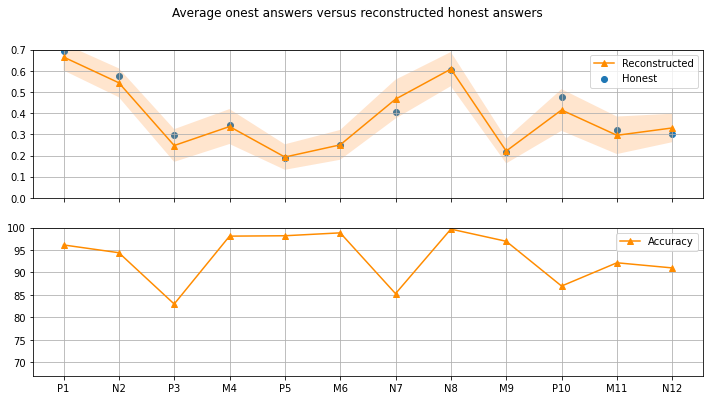

K Neighbors Regressor 
The mean squared error is: 0.0735 
The mean absolute error is: 0.2207


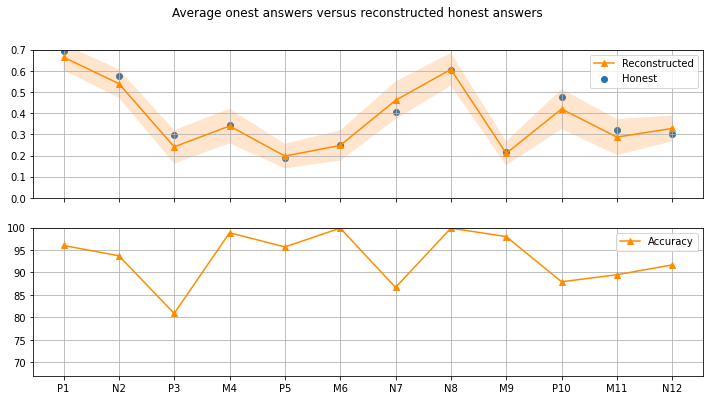

Random Forest Regressor 
The mean squared error is: 0.0735 
The mean absolute error is: 0.2209


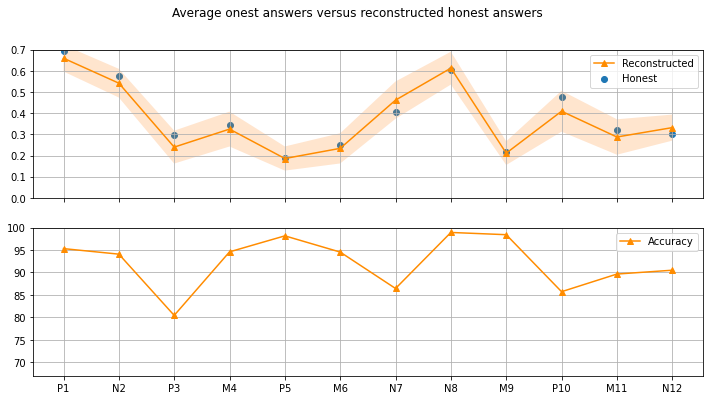

Decision Tree Regressor 
The mean squared error is: 0.0731 
The mean absolute error is: 0.2206


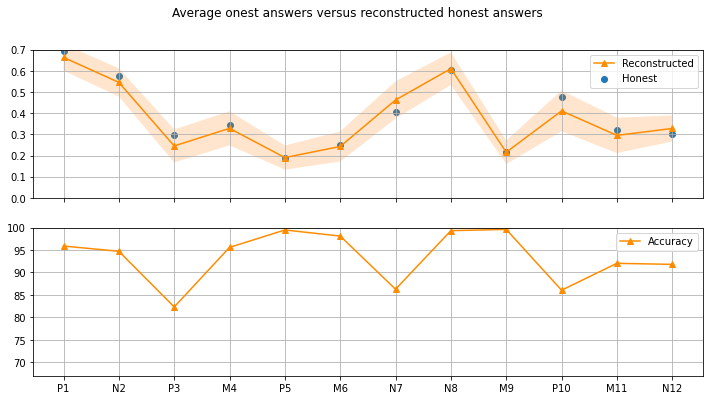

Support Vector RBF Regressor 
The mean squared error is: 0.0795 
The mean absolute error is: 0.2293


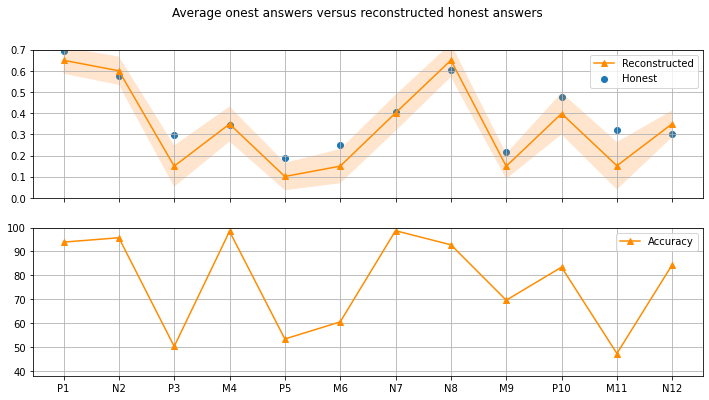

Support Vector Poly Regressor 
The mean squared error is: 0.0792 
The mean absolute error is: 0.2290


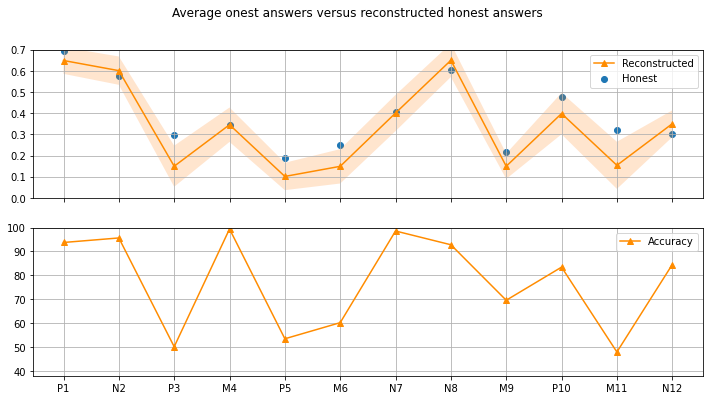

Support Vector Linear Regressor 
The mean squared error is: 0.0794 
The mean absolute error is: 0.2293


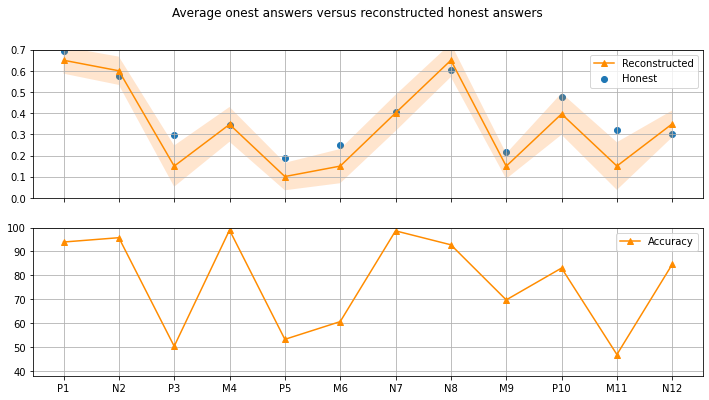

Multi Layer Perceptron Regressor 
The mean squared error is: 0.0736 
The mean absolute error is: 0.2210


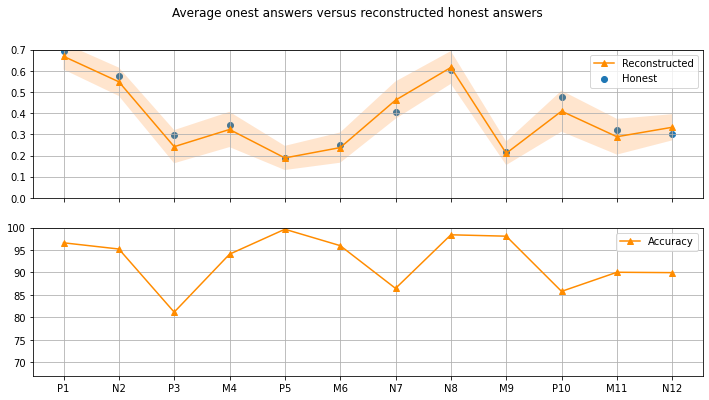

Ridge Regressor 
The mean squared error is: 0.0735 
The mean absolute error is: 0.2210


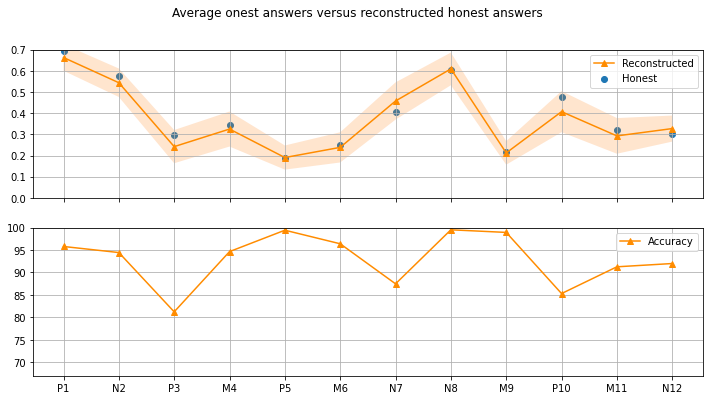

'Ridge Regressor:    RMSE: 0.2712 MSE: 0.0735 MAE: 0.2210'

In [16]:
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {}
regression('Linear Regression', LinearRegression(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'n_neighbors': range(100,201,5)}
regression('K Neighbors Regressor', KNeighborsRegressor(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'n_estimators': range(10,61,10), 'random_state': [123]}
regression('Random Forest Regressor', RandomForestRegressor(max_depth=1, min_samples_leaf=2), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'max_depth': range(1,8,1), 'min_samples_leaf': range(1,11,1), 'random_state': [123]}
regression('Decision Tree Regressor', DecisionTreeRegressor(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector RBF Regressor', MultiOutputRegressor(SVR(epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector Poly Regressor', MultiOutputRegressor(SVR(kernel='poly',epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector Linear Regressor', MultiOutputRegressor(SVR(kernel='linear', epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'hidden_layer_sizes': [(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),]}
regression('Multi Layer Perceptron Regressor', MLPRegressor(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=123), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'alpha': [1000, 100, 10, 1, 0.1, 0.001, 0.0001], 'random_state': [123]}
regression('Ridge Regressor', Ridge(), parameters, dis_train, hon_train, dis_test, hon_test)

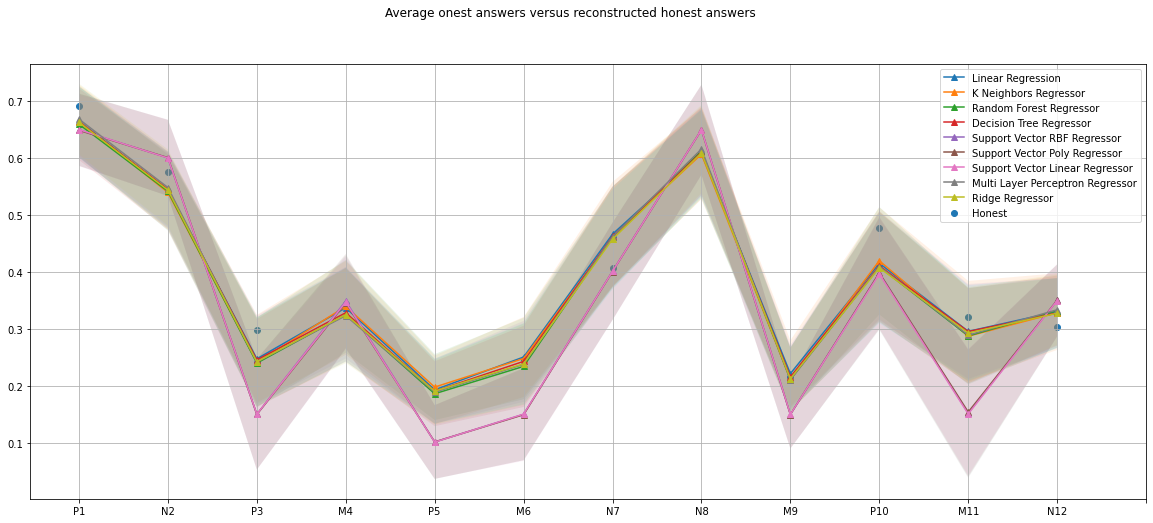

In [17]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
f.suptitle('Average onest answers versus reconstructed honest answers')
plt.scatter(e, hon_test.mean(axis=0), label='Honest', marker='o')

for i in range(len(pred_glob)):
  plt.plot(pred_glob[i], label=reg_glob[i], marker='^')
  plt.fill_between(range(len(e)),pred_glob[i]-m_glob[i], pred_glob[i]+m_glob[i], alpha=.1)

plt.legend()
plt.grid()
plt.xticks(range(0,13), labels=e)
plt.show()

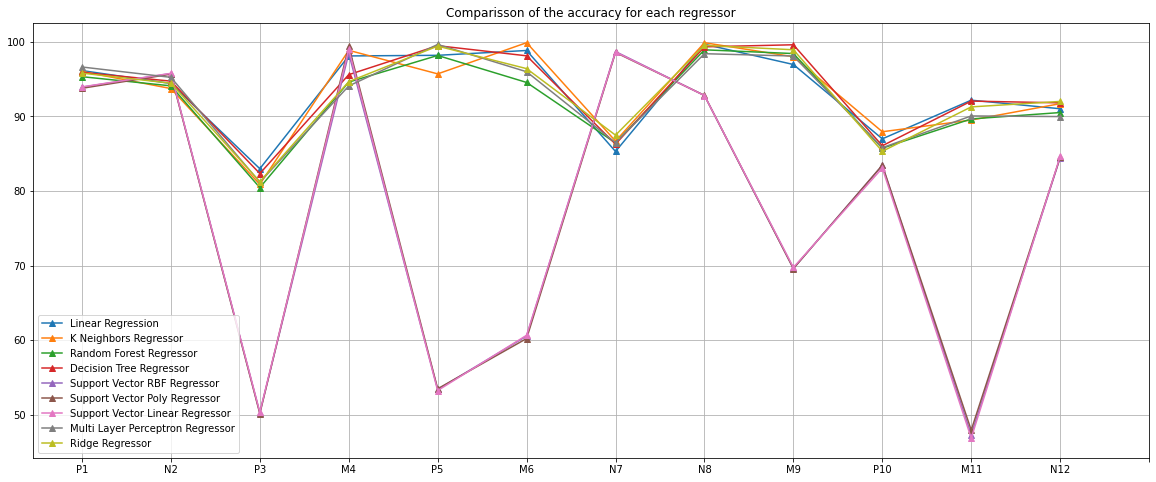

In [19]:
# import plotly.express as px

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

for i in range(len(perc)):
  plt.plot(perc[i], label='{}'.format(reg_glob[i]), marker='^')

plt.title('Comparisson of the accuracy for each regressor')
plt.legend()
plt.grid()
plt.xticks(range(0,13), labels=e)
plt.show()

In [20]:
score = {'Root Mean Squared Error': rmse_glob, 'Mean Squared Error': mse_glob,  'Mean Absolute Error': mae_glob, 'Average accuracy': np.array(perc).mean(axis=1)}

In [21]:
resume = pd.DataFrame(score, index=reg_glob)
resume

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Average accuracy
Linear Regression,0.274858,0.075547,0.222757,93.384414
K Neighbors Regressor,0.271119,0.073506,0.220652,93.219358
Random Forest Regressor,0.271141,0.073517,0.220942,92.227830
Decision Tree Regressor,0.270404,0.073118,0.220621,93.427327
Support Vector RBF Regressor,0.281878,0.079455,0.229332,77.380145
Support Vector Poly Regressor,0.281432,0.079204,0.228957,77.459007
Support Vector Linear Regressor,0.281862,0.079446,0.229251,77.385636
Multi Layer Perceptron Regressor,0.271331,0.073621,0.220992,92.614969
Ridge Regressor,0.271165,0.073530,0.221002,93.028335
